### **Laboratorio 5**

*grupo:*
- Gabriela Contreras: 20213
- Paola de León: 20361
- Diego Córdova: 20212

In [143]:
# !pip install gymnasium

In [144]:
import matplotlib.pyplot as plt
import gymnasium as gym
import numpy as np

In [145]:
import gymnasium as gym

env = gym.make("CliffWalking-v0")

# Parametros
alpha = 0.3
gamma = 0.99
epsilon = 0.01
episodes = 1000

max_steps_per_episode = 30

n_actions = env.action_space.n
n_states = env.observation_space.n

# Función epsilon-greedy
def epsilon_greedy_policy(state, Q, epsilon):
    if np.random.rand() < epsilon:
        return np.random.choice(n_actions)
    else:
        return np.argmax(Q[state])

Q = np.zeros((n_states, n_actions))

### Implementacion de SARSA

In [146]:
# Algoritmo SARSA
# Code based on: https://www.geeksforgeeks.org/sarsa-reinforcement-learning/

#Function to learn the Q-value
def update(state, state2, reward, action, action2):
    predict = Q[state, action]
    return Q[state, action] + alpha * (reward + gamma * Q[state2, action2] - predict)

def sars_step(env, state, action):
    next_state, reward, done, _, _ = env.step(action)
    if done: return state, action, reward, done

    next_action = epsilon_greedy_policy(next_state, Q, epsilon)

    Q[state, action] = update(state, next_state, reward, action, next_action)

    return next_state, next_action, reward, done


### Implementacion de Q-Learning

In [147]:
def q_learning(env, episodes, max_steps_per_episode, alpha, gamma, epsilon):
    rewards = []

    for episode in range(episodes):
        state = env.reset()[0]
        totalReward = 0

        for step in range(max_steps_per_episode):
            # Paso 5: Escoger A desde S usando la política epsilon-greedy
            action = epsilon_greedy_policy(state, Q, epsilon)

            # Paso 6: Tomar acción A, observar R y S'
            S_prima, R, done, _, _ = env.step(action)
            totalReward += R

            # Paso 7: Actualizar Q(S, A)
            bestNextAction = np.argmax(Q[S_prima])
            Q[state, action] += alpha * (R + gamma * Q[S_prima, bestNextAction] - Q[state, action])

            # Paso 8: S <- S'
            state = S_prima

            # Si S es terminal, salir del bucle
            if done:
                break

        rewards.append(totalReward)

    return Q, rewards

### Ejecucion de Algoritmos

In [148]:
# Training Loop
def trainnin_loop(alg, episodes=10, max_steps_per_episode=10):
    rewards_per_episode = []

    for episode in range(episodes):
        total_reward = 0
        state, _ = env.reset()
        action = epsilon_greedy_policy(state, Q, epsilon)

        for step in range(max_steps_per_episode):

            new_state, new_action, reward, done = alg(env, state, action)

            total_reward += reward
            state, action = new_state, new_action

            if done:
                break

        rewards_per_episode.append(total_reward)

    return rewards_per_episode


### Graficos

In [149]:
def plot_rewards(rewards_per_episode, title: str):
    plt.plot(rewards_per_episode)
    plt.axhline(y=0, color='r', linestyle='--')  # Línea horizontal en y=0
    plt.xlabel('Episodios')
    plt.ylabel('Recompensa total')
    plt.title(f'Recompensa total por episodio en {title}')
    plt.show()

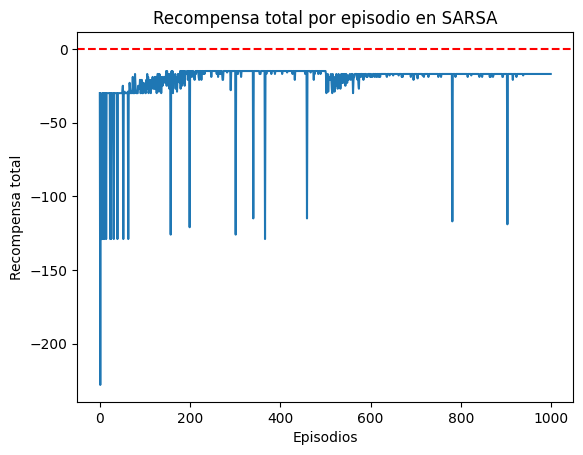

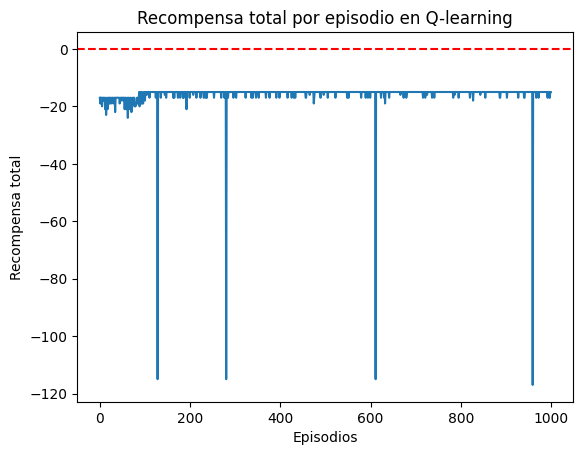

In [150]:
# SARSA
history = trainnin_loop(sars_step, episodes, max_steps_per_episode)
plot_rewards(history, 'SARSA')

# Q-learning
Q, rewards_per_episode = q_learning(env, episodes, max_steps_per_episode, alpha, gamma, epsilon)
plot_rewards(rewards_per_episode, 'Q-learning')
env.close()

### **Resultados**


---

**¿Qué diferencias observa en los patrones de recompensa entre SARSA y Q-Learning?**
La principal diferencia es que Q-learning tiene caídas pronunciadas menos frecuentes pero más esporádicas, mientras que SARSA presenta más caídas, especialmente al inicio, pero con mayor estabilidad en general.

---

**¿Por qué Q-Learning tiende a ser más optimista en sus actualizaciones de valor Q en comparación con SARSA?**
Q-Learning es "off-policy" y actualiza los valores Q asumiendo la mejor acción futura posible, mientras que SARSA es "on-policy" y actualiza en función de la acción realmente tomada, lo que lo hace más cuidadoso con sus decisiones.

---

**¿Cómo afecta la naturaleza "on-policy" de SARSA a su proceso de aprendizaje en comparación con la naturaleza "off-policy" de Q-Learning?**
SARSA, al ser "on-policy", aprende políticas más seguras basadas en acciones reales del agente, mientras que Q-Learning, al ser "off-policy", es más propenso a políticas arriesgadas.

---

**Según las penalizaciones y recompensas del entorno, ¿qué algoritmo parece aprender el camino más seguro? ¿Por qué?**
SARSA parece aprender el camino más seguro, ya que sus recompensas son más estables y menos propensas a caídas, reflejando un aprendizaje más controlado.

---

**¿Cómo podría afectar la disminución de épsilon con el tiempo al rendimiento de cada algoritmo?**
Disminuir ϵ mejorará la estabilidad de SARSA al enfocarse en la política aprendida, mientras que en Q-Learning reducirá exploraciones arriesgadas, pero podría limitar la corrección de políticas incorrectas.

---
